In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
save_root = "/Users/fzhu2/OneDrive/Research/Projects/Patent/Build/ReplicateMS/"

# Caveats

1. $n_t$ and $m_t$ are defined as sum of all citations **up until** $t$.
2. $b_{it}$ seems to be the value at $t$ (i.e., excluding the history) => so $CD_t$ may have gap in $t$.
3. I havn't set the restriction that $CD_t$ is only calculated at $t+1$ (i.e., starting from the year after the priority date) -> Need to have this prior to aggregation to firm level.
4. Need larger sample. Now we only have around 80 companies and less than 900 patents with scores. The panel size is around 600.

# Support functions

In [4]:
def get_year(s=""):
    return s[:4]

# Step 1. Calculate $n_t$


## Part 1. Backward - Forwad

In [5]:
df_bwd = pd.read_csv(save_root+"/df2_bwd_cites_dates.csv")

/Users/fzhu2/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df_bwd.shape

(1268413, 21)

In [7]:
df_bwd.head()

Focal_PatPublNr        BvDID         Company name Latin alphabet  \
0      AR001619A1  AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
1       AT214429T  AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
2       AT414169T  AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
3       AT419392T  AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
4       AT431852T  AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   

   NACE Rev. 2, core code (4 digits) Country ISO code Bwd_CitedPatPublNr  \
0                               8690               AU                NaN   
1                               8690               AU                NaN   
2                               8690               AU                NaN   
3                               8690               AU                NaN   
4                               8690               AU                NaN   

   Bwd_SeqNr Bwd_Publn_ctry Bwd_Publn_date Bwd_GrantDate  ...  \
0        NaN            NaN            NaN           NaN  ...   
1        NaN            NaN            NaN           NaN  ...   
2        NaN            NaN            NaN           NaN  ...   
3        NaN            NaN            NaN           NaN  ...   
4        NaN            NaN            NaN           NaN  ...   

  BwdFwd_PatPublNr BwdFwd_SeqNr  BwdFwd_Publn_ctry BwdFwd_Publn_date  \
0              NaN          NaN                NaN               NaN   
1              NaN          NaN                NaN               NaN   
2              NaN          NaN                NaN               NaN   
3              NaN          NaN                NaN               NaN   
4              NaN          NaN                NaN               NaN   

  BwdFwd_GrantDate BwdFwd_Priority_date Focal_Publn_ctry Focal_Publn_date  \
0              NaN                  NaN               AR       1997-11-26   
1              NaN                  NaN               AT       2002-03-15   
2              NaN                  NaN               AT       2008-11-15   
3              NaN                  NaN               AT       2009-01-15   
4              NaN                  NaN               AT       2009-06-15   

  Focal_GrantDate Focal_Priority_date  
0      1997-11-26          1995-04-13  
1      2002-03-15          1995-04-13  
2      2008-11-15          1998-03-05  
3      2009-01-15          2003-07-04  
4      2009-06-15          1998-03-27  

[5 rows x 21 columns]

In [8]:
df_bwd.columns

Index(['Focal_PatPublNr', 'BvDID', 'Company name Latin alphabet',
       'NACE Rev. 2, core code (4 digits)', 'Country ISO code',
       'Bwd_CitedPatPublNr', 'Bwd_SeqNr', 'Bwd_Publn_ctry', 'Bwd_Publn_date',
       'Bwd_GrantDate', 'Bwd_Priority_date', 'BwdFwd_PatPublNr',
       'BwdFwd_SeqNr', 'BwdFwd_Publn_ctry', 'BwdFwd_Publn_date',
       'BwdFwd_GrantDate', 'BwdFwd_Priority_date', 'Focal_Publn_ctry',
       'Focal_Publn_date', 'Focal_GrantDate', 'Focal_Priority_date'],
      dtype='object')

In [9]:
## Remove NaN priority date observations
ix_haspriority = pd.notna(df_bwd['BwdFwd_Priority_date'])
ix_haspriority

0          False
1          False
2          False
3          False
4          False
           ...  
1268408     True
1268409     True
1268410     True
1268411     True
1268412     True
Name: BwdFwd_Priority_date, Length: 1268413, dtype: bool

In [10]:
df_bwd2 = df_bwd.loc[ix_haspriority,]

In [11]:
df_bwd2.shape

(1202181, 21)

In [12]:
df_bwd2['BwdFwd_Priority_year'] = df_bwd2['BwdFwd_Priority_date'].map(str).apply(get_year)

/Users/fzhu2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df_bwd2['BwdFwd_Priority_year'].unique()

array(['1996', '2000', '1995', '1992', '1998', '2003', '2001', '1999',
       '2006', '2004', '2005', '2002', '1997', '2008', '2007', '1989',
       '2009', '1994', '2011', '2010', '2012', '1993', '2014', '2016',
       '2017', '2015', '1990', '1984', '2013', '1986', '1988', '1991',
       '2018', '1978', '1983', '1982', '1973', '1985', '1987', '1981',
       '1977', '1979', '1975', '1974', '1961', '1967', '1972', '1966',
       '1958', '1955', '1960', '1963', '2019', '1946', '1956', '1952',
       '1959', '1962', '1976', '1980', '1965', '1964', '1969', '1971',
       '1947', '1948', '1953', '1908', '1970', '1968', '1940', '1949',
       '1951', '1945', '1931', '1957', '1943', '1950', '1920', '2020'],
      dtype=object)

In [14]:
df_bwd_stats = df_bwd2[['Focal_PatPublNr','BwdFwd_Priority_year', 'BwdFwd_PatPublNr']]

In [24]:
df_bwd_stats.rename(columns={"BwdFwd_Priority_year":"year",
                             'BwdFwd_PatPublNr':"EndPatNr"},inplace=True)

In [25]:
df_bwd_stats

Focal_PatPublNr  year        EndPatNr
12           AU1860597A  1996      EP932362B1
13           AU1860597A  1996      EP883374B1
14           AU1860597A  2000     EP1174082B1
15           AU1860597A  1995      US5938599A
16           AU1860597A  1992     US7189208B1
...                 ...   ...             ...
1268408  WO2019237158A1  2014     EP3220833B1
1268409  WO2019237158A1  2018  WO2019237158A1
1268410  WO2019237158A1  2017  WO2019083972A1
1268411  WO2019237158A1  2018  WO2019237158A1
1268412  WO2019237158A1  2018  WO2020073007A1

[1202181 rows x 3 columns]

In [39]:
df_bwd_idx = df_bwd_stats.set_index(['Focal_PatPublNr','year'])
df_bwd_idx

EndPatNr
Focal_PatPublNr year                
AU1860597A      1996      EP932362B1
                1996      EP883374B1
                2000     EP1174082B1
                1995      US5938599A
                1992     US7189208B1
...                              ...
WO2019237158A1  2014     EP3220833B1
                2018  WO2019237158A1
                2017  WO2019083972A1
                2018  WO2019237158A1
                2018  WO2020073007A1

[1202181 rows x 1 columns]

In [41]:
df_bwd_idx.to_csv(save_root+"/df_bwd_idx.csv")

## Part 2. Focal - Fwd

In [31]:
df_fwd = pd.read_csv(save_root+"/df2_fwd_date.csv")
print('df_fwd shape: ',df_fwd.shape)

df_fwd shape:  (16759, 12)


In [32]:
ix_haspriority = pd.notna(df_fwd['Fwd_Priority_date'])
ix_haspriority

0        False
1        False
2        False
3        False
4        False
         ...  
16754     True
16755     True
16756    False
16757    False
16758    False
Name: Fwd_Priority_date, Length: 16759, dtype: bool

In [33]:
df_fwd = df_fwd.loc[ix_haspriority,]

In [34]:
df_fwd['Fwd_Priority_date'] = df_fwd['Fwd_Priority_date'].map(str).apply(get_year)

In [35]:
df_fwd_stats = df_fwd[['Focal_PatPublNr','Fwd_Priority_date','Fwd_CitingPatPublNr']]

In [36]:
df_fwd_stats.rename(columns={"Fwd_Priority_date":"year",
                              "Fwd_CitingPatPublNr":"EndPatNr"},inplace=True)

/Users/fzhu2/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4298: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
df_fwd_stats

Focal_PatPublNr  year      EndPatNr
105        AU731135B2  2011   US9113943B2
112        AU755314B2  2007   US8097774B2
154       CA2304268A1  2000   US7541184B2
155       CA2304268A1  2000   US7572631B2
156       CA2304268A1  2002   US8617884B2
...               ...   ...           ...
16751  WO2011121631A1  2012  CN104755246B
16752  WO2011121631A1  2012  CN104755246A
16753  WO2011121631A1  2014  CN106457174A
16754  WO2011121631A1  2017  CN107441968A
16755  WO2011121631A1  2013   EP3009184B1

[13213 rows x 3 columns]

In [38]:
df_fwd_idx = df_fwd_stats.set_index(['Focal_PatPublNr','year'])
df_fwd_idx

EndPatNr
Focal_PatPublNr year              
AU731135B2      2011   US9113943B2
AU755314B2      2007   US8097774B2
CA2304268A1     2000   US7541184B2
                2000   US7572631B2
                2002   US8617884B2
...                            ...
WO2011121631A1  2012  CN104755246B
                2012  CN104755246A
                2014  CN106457174A
                2017  CN107441968A
                2013   EP3009184B1

[13213 rows x 1 columns]

In [42]:
df_fwd_idx.to_csv(save_root+"/df_fwd_idx.csv")

### Side: Calculate $m_t$ from focal-forwad

In [83]:
df_fwd_stats['Count'] = 1

/Users/fzhu2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
df_fwd_stats.drop(columns=['EndPatNr'],inplace=True)

/Users/fzhu2/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [90]:
df_mt_counts = df_fwd_stats.groupby(['Focal_PatPublNr','year']).count()
df_mt_counts

Count
Focal_PatPublNr year       
AU2003273218A1  2010      1
AU2004298951A1  2005      1
AU2004298951B2  2005      1
AU2006216732A1  2010      1
AU2008316319A1  2017      1
...                     ...
WO9961880A2     2007      4
                2008      1
                2010      1
                2015      1
                2016      1

[4020 rows x 1 columns]

In [91]:
df_mt_cumsum = df_mt_counts.groupby(level=0).cumsum()

In [92]:
df_mt_cumsum

Count
Focal_PatPublNr year       
AU2003273218A1  2010      1
AU2004298951A1  2005      1
AU2004298951B2  2005      1
AU2006216732A1  2010      1
AU2008316319A1  2017      1
...                     ...
WO9961880A2     2007      5
                2008      6
                2010      7
                2015      8
                2016      9

[4020 rows x 1 columns]

In [94]:
df_mt_cumsum.columns=['mt']

In [95]:
df_mt_cumsum.to_csv(save_root+"/df_mt_cumsum.csv")

## Part 3. Merge BwdFwd and FocalFwd

In [60]:
df_nt = pd.concat([df_bwd_idx,df_fwd_idx])
df_nt.reset_index(inplace=True)
df_nt.shape

(1215394, 3)

In [61]:
df_nt

Focal_PatPublNr  year      EndPatNr
0            AU1860597A  1996    EP932362B1
1            AU1860597A  1996    EP883374B1
2            AU1860597A  2000   EP1174082B1
3            AU1860597A  1995    US5938599A
4            AU1860597A  1992   US7189208B1
...                 ...   ...           ...
1215389  WO2011121631A1  2012  CN104755246B
1215390  WO2011121631A1  2012  CN104755246A
1215391  WO2011121631A1  2014  CN106457174A
1215392  WO2011121631A1  2017  CN107441968A
1215393  WO2011121631A1  2013   EP3009184B1

[1215394 rows x 3 columns]

In [64]:
df_nt.sort_values(["Focal_PatPublNr",'year']).to_csv(save_root+"df_nt_sorted.csv")

In [68]:
df_nt2 = df_nt.drop_duplicates(subset=['Focal_PatPublNr','year','EndPatNr'])

In [70]:
df_nt2.shape

(873886, 3)

In [71]:
df_nt2.sort_values(["Focal_PatPublNr",'year']).to_csv(save_root+"df_nt2_sorted.csv")

In [ ]:
#df_nt2 keeps only the unique end fwd citations for each (focal pat, year) pair

In [73]:
df_nt2

Focal_PatPublNr  year      EndPatNr
0            AU1860597A  1996    EP932362B1
1            AU1860597A  1996    EP883374B1
2            AU1860597A  2000   EP1174082B1
3            AU1860597A  1995    US5938599A
4            AU1860597A  1992   US7189208B1
...                 ...   ...           ...
1215389  WO2011121631A1  2012  CN104755246B
1215390  WO2011121631A1  2012  CN104755246A
1215391  WO2011121631A1  2014  CN106457174A
1215392  WO2011121631A1  2017  CN107441968A
1215393  WO2011121631A1  2013   EP3009184B1

[873886 rows x 3 columns]

In [74]:
df_nt2['Count'] = 1

/Users/fzhu2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
df_nt2_counts = df_nt.groupby(['Focal_PatPublNr','year']).count()
df_nt2_counts

EndPatNr
Focal_PatPublNr year          
AU1860597A      1989         1
                1992        30
                1993         1
                1994         3
                1995        13
...                        ...
WO9961880A3     2010         4
                2011         7
                2013         2
                2014         1
                2017         2

[33551 rows x 1 columns]

In [76]:
df_nt2_cumsum = df_nt2_counts.groupby(level=0).cumsum()

In [77]:
df_nt2_cumsum

EndPatNr
Focal_PatPublNr year          
AU1860597A      1989         1
                1992        31
                1993        32
                1994        35
                1995        48
...                        ...
WO9961880A3     2010       278
                2011       285
                2013       287
                2014       288
                2017       290

[33551 rows x 1 columns]

In [80]:
df_nt2_cumsum.columns = ['nt']

In [81]:
df_nt2_cumsum.to_csv(save_root+"/df_nt_cumsum.csv")

## Part 4. Merge $n_t$ and $m_t$

In [98]:
df_mt_cumsum.reset_index(inplace=True)
df_nt2_cumsum.reset_index(inplace=True)

In [99]:
df_mn = df_mt_cumsum.merge(df_nt2_cumsum,on=['Focal_PatPublNr','year'],how='outer')

In [100]:
df_mn

Focal_PatPublNr  year   mt   nt
0      AU2003273218A1  2010  1.0  161
1      AU2004298951A1  2005  1.0    1
2      AU2004298951B2  2005  1.0  150
3      AU2006216732A1  2010  1.0  209
4      AU2008316319A1  2017  1.0    1
...               ...   ...  ...  ...
33546     WO9961880A3  2010  NaN  278
33547     WO9961880A3  2011  NaN  285
33548     WO9961880A3  2013  NaN  287
33549     WO9961880A3  2014  NaN  288
33550     WO9961880A3  2017  NaN  290

[33551 rows x 4 columns]

In [102]:
## Save
df_mn.to_csv(save_root+"/df_mn.csv")

In [ ]:
## Merge with BvDID and Company name and country ISO ...

In [104]:
df_company = pd.read_csv(save_root+"df_basic3883.csv")

In [106]:
df_company.columns

Index(['Unnamed: 0', 'PatPublNr', 'BvDID', 'Company name Latin alphabet',
       'NACE Rev. 2, core code (4 digits)', 'Country ISO code'],
      dtype='object')

In [107]:
df_info = df_company[['PatPublNr','BvDID','Company name Latin alphabet',
                      'NACE Rev. 2, core code (4 digits)', 'Country ISO code']]

In [108]:
df_info

PatPublNr            BvDID         Company name Latin alphabet  \
0         AR001619A1      AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
1          AT214429T      AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
2          AT414169T      AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
3          AT419392T      AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
4          AT431852T      AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
...              ...              ...                                 ...   
3878  WO2010092822A1  JP9010401033060                     SOUKEN CO.,LTD.   
3879  WO2011010342A1  JP9010401033060                     SOUKEN CO.,LTD.   
3880  WO2011121631A1  JP9010401033060                     SOUKEN CO.,LTD.   
3881  WO2019225678A1  JP2010701011540  CMIC HEALTHCARE INSTITUTE CO.,LTD.   
3882  WO2019237158A1      AU617096652       MICROBA LIFE SCIENCES LIMITED   

      NACE Rev. 2, core code (4 digits) Country ISO code  
0                                  8690               AU  
1                                  8690               AU  
2                                  8690               AU  
3                                  8690               AU  
4                                  8690               AU  
...                                 ...              ...  
3878                               8690               JP  
3879                               8690               JP  
3880                               8690               JP  
3881                               8690               JP  
3882                               8690               AU  

[3883 rows x 5 columns]

In [111]:
df_mn_population = df_mn.merge(df_info,left_on='Focal_PatPublNr',right_on="PatPublNr",
                         how='right')

In [112]:
df_mn_population

Focal_PatPublNr  year  mt    nt       PatPublNr        BvDID  \
0                 NaN   NaN NaN   NaN      AR001619A1  AU003328176   
1                 NaN   NaN NaN   NaN       AT214429T  AU003328176   
2                 NaN   NaN NaN   NaN       AT414169T  AU003328176   
3                 NaN   NaN NaN   NaN       AT419392T  AU003328176   
4                 NaN   NaN NaN   NaN       AT431852T  AU003328176   
...               ...   ...  ..   ...             ...          ...   
37588  WO2019237158A1  2013 NaN  61.0  WO2019237158A1  AU617096652   
37589  WO2019237158A1  2014 NaN  69.0  WO2019237158A1  AU617096652   
37590  WO2019237158A1  2015 NaN  72.0  WO2019237158A1  AU617096652   
37591  WO2019237158A1  2017 NaN  73.0  WO2019237158A1  AU617096652   
37592  WO2019237158A1  2018 NaN  78.0  WO2019237158A1  AU617096652   

              Company name Latin alphabet  NACE Rev. 2, core code (4 digits)  \
0      JOHNSON & JOHNSON RESEARCH PTY LTD                               8690   
1      JOHNSON & JOHNSON RESEARCH PTY LTD                               8690   
2      JOHNSON & JOHNSON RESEARCH PTY LTD                               8690   
3      JOHNSON & JOHNSON RESEARCH PTY LTD                               8690   
4      JOHNSON & JOHNSON RESEARCH PTY LTD                               8690   
...                                   ...                                ...   
37588       MICROBA LIFE SCIENCES LIMITED                               8690   
37589       MICROBA LIFE SCIENCES LIMITED                               8690   
37590       MICROBA LIFE SCIENCES LIMITED                               8690   
37591       MICROBA LIFE SCIENCES LIMITED                               8690   
37592       MICROBA LIFE SCIENCES LIMITED                               8690   

      Country ISO code  
0                   AU  
1                   AU  
2                   AU  
3                   AU  
4                   AU  
...                ...  
37588               AU  
37589               AU  
37590               AU  
37591               AU  
37592               AU  

[37593 rows x 9 columns]

In [176]:
len(list(df_mn_population['Focal_PatPublNr'].unique()))

2554

In [ ]:
# Now non-empty entries of Focal_PatPublNr are those where we can find at leaset either Bwd or Focal-Fwd information

In [113]:
## Save
df_mn_population.to_csv(save_root+"/df_mn_population.csv")

# Step 2. Calculate summand

In [115]:
df_s = pd.read_csv(save_root+"/df2_fb_cleaned_pred.csv")

/Users/fzhu2/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,13,14,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [116]:
df_s

PatPublNr            BvDID         Company name Latin alphabet  \
0           CN101600808A      AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
1           CN101600808A      AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
2           CN101600808A      AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
3           CN101600808A      AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
4           CN101600808A      AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
...                  ...              ...                                 ...   
30438632  WO2011121631A1  JP9010401033060                     SOUKEN CO.,LTD.   
30438633  WO2011121631A1  JP9010401033060                     SOUKEN CO.,LTD.   
30438634  WO2011121631A1  JP9010401033060                     SOUKEN CO.,LTD.   
30438635  WO2011121631A1  JP9010401033060                     SOUKEN CO.,LTD.   
30438636  WO2011121631A1  JP9010401033060                     SOUKEN CO.,LTD.   

          NACE Rev. 2, core code (4 digits) Country ISO code Focal_Publn_ctry  \
0                                      8690               AU               CN   
1                                      8690               AU               CN   
2                                      8690               AU               CN   
3                                      8690               AU               CN   
4                                      8690               AU               CN   
...                                     ...              ...              ...   
30438632                               8690               JP               WO   
30438633                               8690               JP               WO   
30438634                               8690               JP               WO   
30438635                               8690               JP               WO   
30438636                               8690               JP               WO   

         Focal_Publn_date Focal_GrantDate Focal_Priority_date  \
0              2009-12-09             NaN          2006-10-06   
1              2009-12-09             NaN          2006-10-06   
2              2009-12-09             NaN          2006-10-06   
3              2009-12-09             NaN          2006-10-06   
4              2009-12-09             NaN          2006-10-06   
...                   ...             ...                 ...   
30438632       2011-10-06             NaN          2010-03-29   
30438633       2011-10-06             NaN          2010-03-29   
30438634       2011-10-06             NaN          2010-03-29   
30438635       2011-10-06             NaN          2010-03-29   
30438636       2011-10-06             NaN          2010-03-29   

         Fwd_CitingPatPublNr  ...  Fwd_GrantDate Fwd_Priority_date  \
0               CN105763200A  ...            NaN        2016-02-05   
1               CN105763200A  ...            NaN        2016-02-05   
2               CN105763200A  ...            NaN        2016-02-05   
3               CN105763200B  ...     2018-10-16        2016-02-05   
4               CN105763200B  ...     2018-10-16        2016-02-05   
...                      ...  ...            ...               ...   
30438632        US10293309B2  ...     2019-05-21               NaN   
30438633        US10293309B2  ...     2019-05-21               NaN   
30438634        US10293309B2  ...     2019-05-21               NaN   
30438635        US10293309B2  ...     2019-05-21               NaN   
30438636        US10293309B2  ...     2019-05-21               NaN   

         Bwd_CitedPatPublNr Bwd_SeqNr Bwd_Publn_ctry Bwd_Publn_date  \
0              CN101365808A       1.0             CN     2009-02-11   
1              CN101365808A       1.0             CN     2009-02-11   
2              CN101365808A       1.0             CN     2009-02-11   
3              CN101365808A       1.0             CN     2009-02-11   
4              CN101365808A       1.0             CN     2009-02-11   
...                  

In [117]:
df_s.columns

Index(['PatPublNr', 'BvDID', 'Company name Latin alphabet',
       'NACE Rev. 2, core code (4 digits)', 'Country ISO code',
       'Focal_Publn_ctry', 'Focal_Publn_date', 'Focal_GrantDate',
       'Focal_Priority_date', 'Fwd_CitingPatPublNr', 'Fwd_SeqNr',
       'Fwd_Publn_ctry', 'Fwd_Publn_date', 'Fwd_GrantDate',
       'Fwd_Priority_date', 'Bwd_CitedPatPublNr', 'Bwd_SeqNr',
       'Bwd_Publn_ctry', 'Bwd_Publn_date', 'Bwd_GrantDate',
       'Bwd_Priority_date', 'FwdPred_PatPublNr', 'FwdPred_SeqNr'],
      dtype='object')

In [119]:
df_s['year'] = df_s['Fwd_Priority_date'].map(str).apply(get_year)

In [120]:
df_s['year'].unique()

array(['2016', '2010', '2012', '2000', '1999', '2008', '2007', '2013',
       '2009', '2001', '2002', 'nan', '1994', '2003', '2004', '2011',
       '2015', '1992', '1998', '2006', '2005', '1995', '2018', '2017',
       '2014', '1996', '1991', '1987', '1985', '1989', '1986', '1997',
       '1993', '2019', '1981', '1988', '1990', '1980', '1978'],
      dtype=object)

In [121]:
ix_haspriority = pd.notnull(df_s['year'])

In [124]:
np.sum(ix_haspriority)

30438637

In [122]:
df_s2 = df_s.loc[ix_haspriority,]

In [123]:
df_s2.shape

(30438637, 24)

In [128]:
df_s2.columns

Index(['PatPublNr', 'BvDID', 'Company name Latin alphabet',
       'NACE Rev. 2, core code (4 digits)', 'Country ISO code',
       'Focal_Publn_ctry', 'Focal_Publn_date', 'Focal_GrantDate',
       'Focal_Priority_date', 'Fwd_CitingPatPublNr', 'Fwd_SeqNr',
       'Fwd_Publn_ctry', 'Fwd_Publn_date', 'Fwd_GrantDate',
       'Fwd_Priority_date', 'Bwd_CitedPatPublNr', 'Bwd_SeqNr',
       'Bwd_Publn_ctry', 'Bwd_Publn_date', 'Bwd_GrantDate',
       'Bwd_Priority_date', 'FwdPred_PatPublNr', 'FwdPred_SeqNr', 'year'],
      dtype='object')

In [129]:
df_s3 = df_s2.set_index(['PatPublNr','year',
                         'Fwd_CitingPatPublNr'])

In [131]:
df_s3.head(n=10)

BvDID  \
PatPublNr    year Fwd_CitingPatPublNr                
CN101600808A 2016 CN105763200A         AU003328176   
                  CN105763200A         AU003328176   
                  CN105763200A         AU003328176   
                  CN105763200B         AU003328176   
                  CN105763200B         AU003328176   

                                              Company name Latin alphabet  \
PatPublNr    year Fwd_CitingPatPublNr                                       
CN101600808A 2016 CN105763200A         JOHNSON & JOHNSON RESEARCH PTY LTD   
                  CN105763200A         JOHNSON & JOHNSON RESEARCH PTY LTD   
                  CN105763200A         JOHNSON & JOHNSON RESEARCH PTY LTD   
                  CN105763200B         JOHNSON & JOHNSON RESEARCH PTY LTD   
                  CN105763200B         JOHNSON & JOHNSON RESEARCH PTY LTD   

                                       NACE Rev. 2, core code (4 digits)  \
PatPublNr    year Fwd_CitingPatPublNr                                      
CN101600808A 2016 CN105763200A                                      8690   
                  CN105763200A                                      8690   
                  CN105763200A                                      8690   
                  CN105763200B                                      8690   
                  CN105763200B                                      8690   

                                      Country ISO code Focal_Publn_ctry  \
PatPublNr    year Fwd_CitingPatPublNr                                     
CN101600808A 2016 CN105763200A                      AU               CN   
                  CN105763200A                      AU               CN   
                  CN105763200A                      AU               CN   
                  CN105763200B                      AU               CN   
                  CN105763200B                      AU               CN   

                                      Focal_Publn_date Focal_GrantDate  \
PatPublNr    year Fwd_CitingPatPublNr                                    
CN101600808A 2016 CN105763200A              2009-12-09             NaN   
                  CN105763200A              2009-12-09             NaN   
                  CN105763200A              2009-12-09             NaN   
                  CN105763200B              2009-12-09             NaN   
                  CN105763200B              2009-12-09             NaN   

                                      Focal_Priority_date  Fwd_SeqNr  \
PatPublNr    year Fwd_CitingPatPublNr                                  
CN101600808A 2016 CN105763200A                 2006-10-06        1.0   
                  CN105763200A                 2006-10-06        1.0   
                  CN105763200A                 2006-10-06        1.0   
                  CN105763200B                 2006-10-06        2.0   
                  CN105763200B                 2006-10-06        2.0   

                                      Fwd_Publn_ctry  ... Fwd_GrantDate  \
PatPublNr    year Fwd_CitingPatPublNr                 ...                 
CN101600808A 2016 CN105763200A                    CN  ...           NaN   
                  CN105763200A                    CN  ...           NaN   
                  CN105763200A                    CN  ...           NaN   
                  CN105763200B                    CN  ...    2018-10-16   
                  CN105763200B                    CN  ...    2018-10-16   

                                      Fwd_Priority_date Bwd_CitedPatPublNr  \
PatPublNr    year Fwd_CitingPatPublNr                                        
CN101600808A 2016 CN105763200A               2016-02-05       CN101365808A   
                  CN105763200A               2016-02-05       CN101365808A   
                  CN105763200A               2016-02-05       CN101365808A   
                  CN105763200B               2016-02-05       CN101365808A   
                  CN105763200B               2016

In [140]:
fwd_cites_bwd = list(df_s3["Bwd_CitedPatPublNr"] == df_s3["FwdPred_PatPublNr"])

In [141]:
np.sum(fwd_cites_bwd)

15682

In [142]:
df_s3['fwd_cites_bwd'] = fwd_cites_bwd

In [144]:
df_s4 = df_s3[['fwd_cites_bwd']]
df_s4.reset_index(inplace=True)
df_s4

PatPublNr  year Fwd_CitingPatPublNr  fwd_cites_bwd
0           CN101600808A  2016        CN105763200A          False
1           CN101600808A  2016        CN105763200A          False
2           CN101600808A  2016        CN105763200A          False
3           CN101600808A  2016        CN105763200B          False
4           CN101600808A  2016        CN105763200B          False
...                  ...   ...                 ...            ...
30438632  WO2011121631A1   nan        US10293309B2          False
30438633  WO2011121631A1   nan        US10293309B2          False
30438634  WO2011121631A1   nan        US10293309B2          False
30438635  WO2011121631A1   nan        US10293309B2          False
30438636  WO2011121631A1   nan        US10293309B2          False

[30438637 rows x 4 columns]

In [158]:
df_s4_max = df_s4.groupby(["PatPublNr",'year','Fwd_CitingPatPublNr']).max()

## Calculate $b_{it}$

- Now only calculates basic CDt, ignore the case when we aggregate, we want separately: how many +/- in each year

- use sum can get num of + and use 1-sum can get num of -

In [159]:
df_s4_max.columns = ['b']
df_s4_max['b'] = df_s4_max['b'].map(int)

In [161]:
df_s4_max.reset_index(inplace=True)

In [165]:
df_s4_max = df_s4_max.sort_values(['PatPublNr','year'])

In [168]:
df_s4_max['summand'] = (-2)*df_s4_max["b"] + 1

In [169]:
df_s4_max

PatPublNr  year Fwd_CitingPatPublNr  b  constant  summand
0      AU2003273218A1  2010         US9085622B2  0         1        1
1      AU2004298951B2  2005         US8852584B2  0         1        1
2      AU2006216732A1  2010         US9085622B2  1         1       -1
3          AU734603B2  2009         EP2427770B1  0         1        1
4          AU734603B2  2009         US8580572B2  0         1        1
...               ...   ...                 ... ..       ...      ...
11918     WO9961880A2  2007      WO2009071858A3  0         1        1
11919     WO9961880A2  2008         US8470089B2  0         1        1
11920     WO9961880A2  2010         US8816292B2  1         1       -1
11921     WO9961880A2  2015     US20160259063A1  0         1        1
11922     WO9961880A2  2016         JP6589047B2  0         1        1

[11923 rows x 6 columns]

### Sum to aggregate (Focal patent, year) to get the summation in $CD_t$

In [172]:
df_s5 = df_s4_max.groupby(['PatPublNr','year']).sum()
df_s5 = df_s5[['summand']]

In [178]:
df_s5 = df_s5.reset_index()

In [183]:
df_s5 = df_s5.rename(columns={"summand":"summation"})

In [184]:
df_s5

PatPublNr  year  summation
0     AU2003273218A1  2010          1
1     AU2004298951B2  2005          1
2     AU2006216732A1  2010         -1
3         AU734603B2  2009          3
4       CN101313064B  2013          2
...              ...   ...        ...
3294     WO9961880A2  2007          4
3295     WO9961880A2  2008          1
3296     WO9961880A2  2010         -1
3297     WO9961880A2  2015          1
3298     WO9961880A2  2016          1

[3299 rows x 3 columns]

We have only 906 patents that have summation scores. Probably because many focal patents have no fwd citations

In [180]:
len(list(df_s5['PatPublNr'].unique()))

906

In [193]:
df_s5['year'] = df_s5['year'].map(str)

In [194]:
df_s5.to_csv(save_root+"/df_summation.csv")

In [186]:
## Merge with $m_t$ and $n_t$ scores
df_mn = pd.read_csv(save_root+"/df_mn.csv")

In [197]:
df_mn.shape

(33551, 4)

In [189]:
df_mn.drop(columns=['Unnamed: 0'],inplace=True)

In [195]:
df_mn['year'] = df_mn['year'].map(str)

In [201]:
df_summation_mn = df_mn.merge(df_s5,left_on=['Focal_PatPublNr','year'],right_on=['PatPublNr','year'],
            how='outer')
df_summation_mn.drop(columns=['Focal_PatPublNr'],inplace=True)

In [202]:
df_summation_mn

year   mt     nt       PatPublNr  summation
0      2010  1.0  161.0  AU2003273218A1        1.0
1      2005  1.0    1.0             NaN        NaN
2      2005  1.0  150.0  AU2004298951B2        1.0
3      2010  1.0  209.0  AU2006216732A1       -1.0
4      2017  1.0    1.0             NaN        NaN
...     ...  ...    ...             ...        ...
33783   nan  NaN    NaN  WO2012149609A1        1.0
33784   nan  NaN    NaN  WO2016149771A1        1.0
33785   nan  NaN    NaN  WO2017150366A1       -1.0
33786   nan  NaN    NaN     WO9620412A1        2.0
33787   nan  NaN    NaN     WO9942035A1        1.0

[33788 rows x 5 columns]

In [203]:
df_summation_mn['CDt'] = df_summation_mn['summation'] / df_summation_mn['nt']

In [204]:
df_summation_mn['mCDt'] = df_summation_mn['CDt'] * df_summation_mn['mt']

In [205]:
df_summation_mn

year   mt     nt       PatPublNr  summation       CDt      mCDt
0      2010  1.0  161.0  AU2003273218A1        1.0  0.006211  0.006211
1      2005  1.0    1.0             NaN        NaN       NaN       NaN
2      2005  1.0  150.0  AU2004298951B2        1.0  0.006667  0.006667
3      2010  1.0  209.0  AU2006216732A1       -1.0 -0.004785 -0.004785
4      2017  1.0    1.0             NaN        NaN       NaN       NaN
...     ...  ...    ...             ...        ...       ...       ...
33783   nan  NaN    NaN  WO2012149609A1        1.0       NaN       NaN
33784   nan  NaN    NaN  WO2016149771A1        1.0       NaN       NaN
33785   nan  NaN    NaN  WO2017150366A1       -1.0       NaN       NaN
33786   nan  NaN    NaN     WO9620412A1        2.0       NaN       NaN
33787   nan  NaN    NaN     WO9942035A1        1.0       NaN       NaN

[33788 rows x 7 columns]

In [220]:
ix_hasCdt = pd.notnull(df_summation_mn['CDt'])

### Side: Some statistics about $CD_t$ and $mCD_t$

Note: if an observation has $CD_t$, it must also have $mCD_t$. 

In [214]:
df_CDt = df_summation_mn.loc[ix_hasCdt,]

There are this many of patents that have $CD_t$. Note that we have $3799$ patents at the very beginning.

In [215]:
len(list(df_CDt['PatPublNr'].unique()))

886

In [216]:
df_CDt

year   mt     nt       PatPublNr  summation       CDt      mCDt
0     2010  1.0  161.0  AU2003273218A1        1.0  0.006211  0.006211
2     2005  1.0  150.0  AU2004298951B2        1.0  0.006667  0.006667
3     2010  1.0  209.0  AU2006216732A1       -1.0 -0.004785 -0.004785
8     2009  3.0   98.0      AU734603B2        3.0  0.030612  0.091837
29    2013  2.0   68.0    CN101313064B        2.0  0.029412  0.058824
...    ...  ...    ...             ...        ...       ...       ...
4015  2007  5.0  260.0     WO9961880A2        4.0  0.015385  0.076923
4016  2008  6.0  271.0     WO9961880A2        1.0  0.003690  0.022140
4017  2010  7.0  288.0     WO9961880A2       -1.0 -0.003472 -0.024306
4018  2015  8.0  299.0     WO9961880A2        1.0  0.003344  0.026756
4019  2016  9.0  300.0     WO9961880A2        1.0  0.003333  0.030000

[3062 rows x 7 columns]

In [228]:
df_CDt.to_csv(save_root+'/df_CDt.csv',index=False)

Out sample $CD_t$ mean is of the same magnitude as ($1.5\sigma$ away from) the population mean of 0.07 reported in Table 1 in the paper.

In [217]:
np.mean(df_CDt['CDt'])

0.03570789542105937

In [222]:
np.std(df_CDt['CDt'])

0.11262483071723944

Our sample $mCD_t$ mean is very close to the population mean of $0.31$ reported in Table 1 in the paper.

In [221]:
np.mean(df_CDt['mCDt'])

0.24946607007519347

In [223]:
np.std(df_CDt['mCDt'])

0.9396009307055992

The sample correlation here $0.461$ is also close to the population correlation of $0.53$ reported in Table 1 in the paper.

In [226]:
np.corrcoef(df_CDt['CDt'],df_CDt['mCDt'])

array([[1.        , 0.46143213],
       [0.46143213, 1.        ]])

## Merge $CDt$ and $mCDt$ to firm information. 

- First we will have a panel data in **(BvDID,year,PatPublNr)** unit.

- Then we will aggregate out *PatPublNr* and have the data in **(BvDID,year)**.

### Part 1. Three-unit panel

In [229]:
df_company = pd.read_csv(save_root+"df_basic3883.csv")

In [230]:
df_company.columns

Index(['Unnamed: 0', 'PatPublNr', 'BvDID', 'Company name Latin alphabet',
       'NACE Rev. 2, core code (4 digits)', 'Country ISO code'],
      dtype='object')

In [231]:
df_company.drop(columns=['Unnamed: 0'],inplace=True)

In [233]:
df_company.drop_duplicates(keep='first',inplace=True)

In [235]:
df_company

PatPublNr            BvDID         Company name Latin alphabet  \
0         AR001619A1      AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
1          AT214429T      AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
2          AT414169T      AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
3          AT419392T      AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
4          AT431852T      AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
...              ...              ...                                 ...   
3878  WO2010092822A1  JP9010401033060                     SOUKEN CO.,LTD.   
3879  WO2011010342A1  JP9010401033060                     SOUKEN CO.,LTD.   
3880  WO2011121631A1  JP9010401033060                     SOUKEN CO.,LTD.   
3881  WO2019225678A1  JP2010701011540  CMIC HEALTHCARE INSTITUTE CO.,LTD.   
3882  WO2019237158A1      AU617096652       MICROBA LIFE SCIENCES LIMITED   

      NACE Rev. 2, core code (4 digits) Country ISO code  
0                                  8690               AU  
1                                  8690               AU  
2                                  8690               AU  
3                                  8690               AU  
4                                  8690               AU  
...                                 ...              ...  
3878                               8690               JP  
3879                               8690               JP  
3880                               8690               JP  
3881                               8690               JP  
3882                               8690               AU  

[3799 rows x 5 columns]

In [236]:
len(list(df_company['PatPublNr'].unique()))

3799

In [237]:
len(list(df_company['BvDID'].unique()))

123

In [240]:
df_BvD_year_pat = df_company.merge(df_CDt,left_on=['PatPublNr'],
                                   right_on=['PatPublNr'],how='left')

In [241]:
df_BvD_year_pat

PatPublNr            BvDID         Company name Latin alphabet  \
0         AR001619A1      AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
1          AT214429T      AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
2          AT414169T      AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
3          AT419392T      AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
4          AT431852T      AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
...              ...              ...                                 ...   
5970  WO2011121631A1  JP9010401033060                     SOUKEN CO.,LTD.   
5971  WO2011121631A1  JP9010401033060                     SOUKEN CO.,LTD.   
5972  WO2011121631A1  JP9010401033060                     SOUKEN CO.,LTD.   
5973  WO2019225678A1  JP2010701011540  CMIC HEALTHCARE INSTITUTE CO.,LTD.   
5974  WO2019237158A1      AU617096652       MICROBA LIFE SCIENCES LIMITED   

      NACE Rev. 2, core code (4 digits) Country ISO code  year   mt    nt  \
0                                  8690               AU   NaN  NaN   NaN   
1                                  8690               AU   NaN  NaN   NaN   
2                                  8690               AU   NaN  NaN   NaN   
3                                  8690               AU   NaN  NaN   NaN   
4                                  8690               AU   NaN  NaN   NaN   
...                                 ...              ...   ...  ...   ...   
5970                               8690               JP  2013  3.0  95.0   
5971                               8690               JP  2014  4.0  96.0   
5972                               8690               JP  2017  5.0  97.0   
5973                               8690               JP   NaN  NaN   NaN   
5974                               8690               AU   NaN  NaN   NaN   

      summation       CDt      mCDt  
0           NaN       NaN       NaN  
1           NaN       NaN       NaN  
2           NaN       NaN       NaN  
3           NaN       NaN       NaN  
4           NaN       NaN       NaN  
...         ...       ...       ...  
5970        1.0  0.010526  0.031579  
5971        1.0  0.010417  0.041667  
5972        1.0  0.010309  0.051546  
5973        NaN       NaN       NaN  
5974        NaN       NaN       NaN  

[5975 rows x 11 columns]

In [243]:
ix_hasyear = pd.notnull(df_BvD_year_pat['year'])

In [250]:
df_BvD_year_pat2 = df_BvD_year_pat.loc[ix_hasyear,]

In [251]:
len(list(df_BvD_year_pat2['PatPublNr'].unique()))

886

In [252]:
df_BvD_year_pat3 = df_BvD_year_pat2.set_index(['BvDID','year','PatPublNr'])
df_BvD_year_pat3

Company name Latin alphabet  \
BvDID           year PatPublNr                                            
AU003328176     2016 CN101600808A    JOHNSON & JOHNSON RESEARCH PTY LTD   
                2010 EP1632565A1     JOHNSON & JOHNSON RESEARCH PTY LTD   
                2012 EP1632565A1     JOHNSON & JOHNSON RESEARCH PTY LTD   
                2000 EP871767A1      JOHNSON & JOHNSON RESEARCH PTY LTD   
                1999 EP871767B1      JOHNSON & JOHNSON RESEARCH PTY LTD   
...                                                                 ...   
JP9010401033060 2018 WO2011010342A1                     SOUKEN CO.,LTD.   
                2012 WO2011121631A1                     SOUKEN CO.,LTD.   
                2013 WO2011121631A1                     SOUKEN CO.,LTD.   
                2014 WO2011121631A1                     SOUKEN CO.,LTD.   
                2017 WO2011121631A1                     SOUKEN CO.,LTD.   

                                     NACE Rev. 2, core code (4 digits)  \
BvDID           year PatPublNr                                           
AU003328176     2016 CN101600808A                                 8690   
                2010 EP1632565A1                                  8690   
                2012 EP1632565A1                                  8690   
                2000 EP871767A1                                   8690   
                1999 EP871767B1                                   8690   
...                                                                ...   
JP9010401033060 2018 WO2011010342A1                               8690   
                2012 WO2011121631A1                               8690   
                2013 WO2011121631A1                               8690   
                2014 WO2011121631A1                               8690   
                2017 WO2011121631A1                               8690   

                                    Country ISO code   mt    nt  summation  \
BvDID           year PatPublNr                                               
AU003328176     2016 CN101600808A                 AU  2.0   6.0        2.0   
                2010 EP1632565A1                  AU  7.0  15.0        7.0   
                2012 EP1632565A1                  AU  9.0  17.0        2.0   
                2000 EP871767A1                   AU  2.0  13.0        2.0   
                1999 EP871767B1                   AU  1.0  46.0        1.0   
...                                              ...  ...   ...        ...   
JP9010401033060 2018 WO2011010342A1               JP  3.0  46.0        2.0   
                2012 WO2011121631A1               JP  2.0  93.0        2.0   
                2013 WO2011121631A1               JP  3.0  95.0        1.0   
                2014 WO2011121631A1               JP  4.0  96.0        1.0   
                2017 WO2011121631A1               JP  5.0  97.0        1.0   

                                          CDt      mCDt  
BvDID           year PatPublNr                           
AU003328176     2016 CN101600808A    0.333333  0.666667  
                2010 EP1632565A1     0.466667  3.266667  
                2012 EP1632565A1     0.117647  1.058824  
                2000 EP871767A1      0.153846  0.307692  
                1999 EP871767B1      0.021739  0.021739  
...                                       ...       ...  
JP9010401033060 2018 WO2011010342A1  0.043478  0.130435  
                2012 WO2011121631A1  0.021505  0.043011  
                2013 WO2011121631A1  0.010526  0.031579  
                2014 WO2011121631A1  0.010417  0.041667  
                2017 WO2011121631A1  0.010309  0.051546  

[3062 rows x 8 columns]

In [253]:
df_BvD_year_pat3.to_csv(save_root+"/df_BvD_year_pat.csv")

### Part 2. Two-unit panel

In [255]:
df_BvD_year = df_BvD_year_pat2.groupby(['BvDID','year'])['CDt','mCDt'].mean()
df_BvD_year.reset_index(inplace=True)
df_BvD_year

/Users/fzhu2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


BvDID  year       CDt      mCDt
0    AU003328176  1991  0.036364  0.072727
1    AU003328176  1992  0.016348  0.066285
2    AU003328176  1994 -0.016026 -0.016026
3    AU003328176  1995  0.000813 -0.010184
4    AU003328176  1996  0.052632  0.526316
..           ...   ...       ...       ...
659  US330840570  2018  0.035398  0.172298
660  US522171803  2017  0.083333  0.083333
661  US841346327  2011  0.117647  0.941176
662  US841346327  2012  0.041667  0.458333
663  US841346327  2014  0.007874  0.007874

[664 rows x 4 columns]

Only 81 firms left

In [269]:
len(list(df_BvD_year['BvDID'].unique()))

81

In [270]:
df_BvD_year.to_csv(save_root+"/df_BvD_year.csv",index=False)

In [279]:
df_BvD_year['year'] = df_BvD_year['year'].map(int)

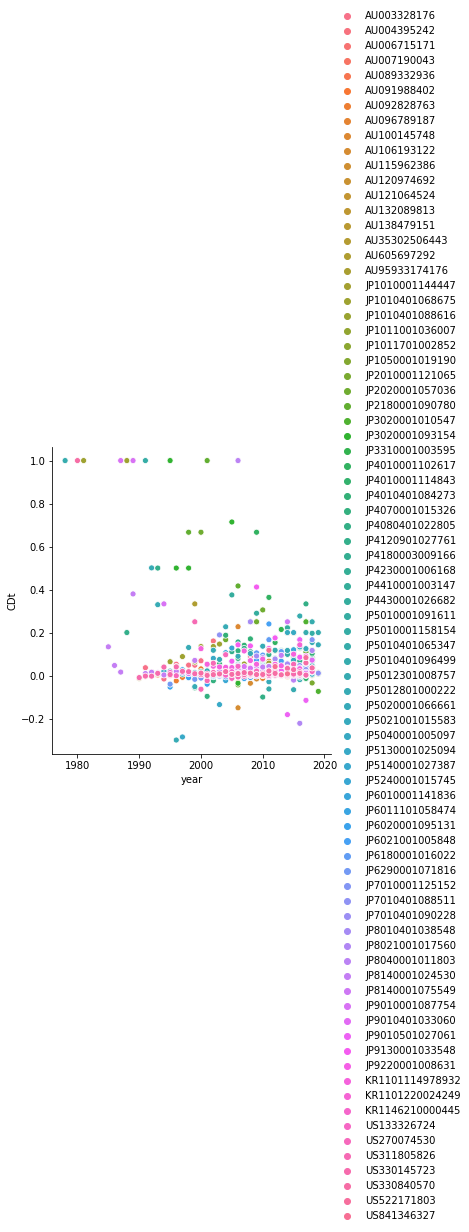

In [284]:
sns.relplot(x="year", y="CDt", hue=df_BvD_year['BvDID'].tolist(), 
            kind = 'scatter',data=df_BvD_year);

### To do:

In [259]:
# Now recover the company name and other variables
df_company2 = df_company.drop(columns=['PatPublNr'])
df_company2.head()

BvDID         Company name Latin alphabet  \
0  AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
1  AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
2  AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
3  AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   
4  AU003328176  JOHNSON & JOHNSON RESEARCH PTY LTD   

   NACE Rev. 2, core code (4 digits) Country ISO code  
0                               8690               AU  
1                               8690               AU  
2                               8690               AU  
3                               8690               AU  
4                               8690               AU

In [262]:
df_BvD_year

BvDID  year       CDt      mCDt
0    AU003328176  1991  0.036364  0.072727
1    AU003328176  1992  0.016348  0.066285
2    AU003328176  1994 -0.016026 -0.016026
3    AU003328176  1995  0.000813 -0.010184
4    AU003328176  1996  0.052632  0.526316
..           ...   ...       ...       ...
659  US330840570  2018  0.035398  0.172298
660  US522171803  2017  0.083333  0.083333
661  US841346327  2011  0.117647  0.941176
662  US841346327  2012  0.041667  0.458333
663  US841346327  2014  0.007874  0.007874

[664 rows x 4 columns]

In [264]:
df_BvD_year2 = df_BvD_year.merge(df_company2,on='BvDID',how='left')

In [266]:
Why becomes 69558? Shouldn't this equal to df_BvD_year?

Why becomes 69558? Shouldn't this equal to df_BvD_year

In [265]:
df_BvD_year2

BvDID  year       CDt      mCDt  \
0      AU003328176  1991  0.036364  0.072727   
1      AU003328176  1991  0.036364  0.072727   
2      AU003328176  1991  0.036364  0.072727   
3      AU003328176  1991  0.036364  0.072727   
4      AU003328176  1991  0.036364  0.072727   
...            ...   ...       ...       ...   
69553  US841346327  2014  0.007874  0.007874   
69554  US841346327  2014  0.007874  0.007874   
69555  US841346327  2014  0.007874  0.007874   
69556  US841346327  2014  0.007874  0.007874   
69557  US841346327  2014  0.007874  0.007874   

              Company name Latin alphabet  NACE Rev. 2, core code (4 digits)  \
0      JOHNSON & JOHNSON RESEARCH PTY LTD                               8690   
1      JOHNSON & JOHNSON RESEARCH PTY LTD                               8690   
2      JOHNSON & JOHNSON RESEARCH PTY LTD                               8690   
3      JOHNSON & JOHNSON RESEARCH PTY LTD                               8690   
4      JOHNSON & JOHNSON RESEARCH PTY LTD                               8690   
...                                   ...                                ...   
69553                  BANYAN CORPORATION                               8621   
69554                  BANYAN CORPORATION                               8621   
69555                  BANYAN CORPORATION                               8621   
69556                  BANYAN CORPORATION                               8621   
69557                  BANYAN CORPORATION                               8621   

      Country ISO code  
0                   AU  
1                   AU  
2                   AU  
3                   AU  
4                   AU  
...                ...  
69553               US  
69554               US  
69555               US  
69556               US  
69557               US  

[69558 rows x 7 columns]